In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [30]:
# TODO
# Implement the linear regression using gradient descent by only numpy

class LinearRegression:
    
    def __init__(self):
        
        print("Don't cheat.")
        self.epoch = []
        self.train_loss = []
        self.weights = None

    def fit( self, X, y, lr=0.001, epochs=100, batch_size=1 ) :
        self.weights = np.ones( (X.shape[1]+1, 1) )
        y = y.reshape( (  y.shape[0] , 1) )
        for epoch in range(epochs):
            X_epoch=np.concatenate((X, np.ones((len(X),1))), axis=1)
            for batch in range(0,len(X),batch_size):
               X_batch = X_epoch[ batch : batch+batch_size ]
               y_batch = y[ batch : batch+batch_size ]
               y_pred = np.dot( X_batch, self.weights)
               # X_batch @ weigths
               gradient = -np.dot( X_batch.T , ( y_batch - y_pred) )  / len(X_batch)

               self.weights = self.weights - lr*gradient

               
            
            self.epoch.append(epoch)
            self.train_loss.append(self.get_loss(X_epoch, y))

    def get_loss(self, X, y):
        y_pred = np.dot( X, self.weights)
        y = y.reshape( (  y.shape[0] , 1) )
        loss = np.mean( np.square( y_pred - y ) ) 
        return loss

    def predict(self, X):
        X_predict=np.concatenate((X, np.ones((len(X),1))), axis=1)
        return np.dot( X_predict ,self.weights )
        
                
    def evaluate(self, X, y):
        y_pred = self.predict( X )
        y = y.reshape( (  y.shape[0] , 1) )
        loss = np.mean( np.square( y_pred - y )  )
        return loss 
        
    def plot_curve(self):
        # self.epoch and self.train_loss may be helpful here. 
        plt.plot(self.epoch, self.train_loss, label="Training Loss")
        plt.title("Training Curve")
        plt.xlabel("Epochs")
        plt.ylabel("Loss")
        plt.legend()
        plt.show()
        pass

# Load data & data pre-processing

In [31]:
df_train = pd.DataFrame(pd.read_csv("./regression_train.csv"))
df_val   = pd.DataFrame(pd.read_csv("./regression_val.csv"))
df_test  = pd.DataFrame(pd.read_csv("./regression_test.csv"))

In [32]:
df_train.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [33]:
df_test.head()

,age,sex,bmi,children,smoker,region,charges
0,33,male,30.25,0,no,southeast,NaN
1,19,female,32.49,0,yes,northwest,NaN
2,50,male,37.07,1,no,southeast,NaN
3,41,female,32.60,3,no,southwest,NaN
4,52,female,24.86,0,no,southeast,NaN


In [34]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 938 entries, 0 to 937
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       938 non-null    int64  
 1   sex       938 non-null    object 
 2   bmi       938 non-null    float64
 3   children  938 non-null    int64  
 4   smoker    938 non-null    object 
 5   region    938 non-null    object 
 6   charges   938 non-null    float64
dtypes: float64(2), int64(2), object(3)
memory usage: 51.4+ KB


In [35]:
# TODO
# You may do the labelEncoder here

#### For multiple features, please use the following settings.####
# sex.female -> 0
# sex.male -> 1
df_test['sex'] = df_test['sex'].replace( { 'female' : 0, 'male' : 1 } )
df_test['smoker'] = df_test['smoker'].replace( { 'no' : 0, 'yes' : 1} )
df_test['region'] = df_test['region'].replace( { 'northeast' : 0, 'northwest' : 1, 'southeast' : 2, 'southwest' : 3  } )

df_train['sex'] = df_train['sex'].replace( { 'female' : 0, 'male' : 1 } )
df_train['smoker'] = df_train['smoker'].replace( { 'no' : 0, 'yes' : 1} )
df_train['region'] = df_train['region'].replace( { 'northeast' : 0, 'northwest' : 1, 'southeast' : 2, 'southwest' : 3  } )

df_val['sex'] = df_val['sex'].replace( { 'female' : 0, 'male' : 1 } )
df_val['smoker'] = df_val['smoker'].replace( { 'no' : 0, 'yes' : 1} )
df_val['region'] = df_val['region'].replace( { 'northeast' : 0, 'northwest' : 1, 'southeast' : 2, 'southwest' : 3  } )

df_test.head()
#df_train.head()
# smoker.no -> 0
# smoker.yes -> 1


##################################################################


# You may try different label encoding for training your own model


,age,sex,bmi,children,smoker,region,charges
0,33,1,30.25,0,0,2,NaN
1,19,0,32.49,0,1,1,NaN
2,50,1,37.07,1,0,2,NaN
3,41,0,32.60,3,0,3,NaN
4,52,0,24.86,0,0,2,NaN


# Single feature (using bmi)

In [36]:
# Do not modify here

x_train = df_train.drop(['charges'], axis=1)
y_train = df_train['charges']
x_train = x_train[['bmi']]

x_val = df_val.drop(['charges'], axis=1)
y_val = df_val['charges']
x_val = x_val[['bmi']]

x_test = df_test.drop(['charges'], axis=1)
x_test = x_test[['bmi']]

In [37]:
# TODO
# You may convert data to NumPy here 
x_train = x_train.to_numpy()
y_train = y_train.to_numpy()


x_test = x_test.to_numpy()

x_val = x_val.to_numpy()
y_val = y_val.to_numpy()


In [38]:
batch_size = x_train.shape[0]

# TODO
# Tune the parameters
# Refer to slide page 9
lr = 0.002
epochs = 100000

linear_reg = LinearRegression()
linear_reg.fit(x_train, y_train, lr=lr, epochs=epochs, batch_size=batch_size)

Don't cheat.


In [39]:
print("Intercepts: ", linear_reg.weights[-1])
print("Weights: ", linear_reg.weights[:-1])

Intercepts:  [1381.60389738]
Weights:  [[380.16374565]]


In [40]:
print('training loss: ', linear_reg.evaluate(x_train, y_train))

training loss:  139562065.5152069


In [41]:
print('validation loss: ', linear_reg.evaluate(x_val, y_val))

validation loss:  136920155.4060738


In [42]:
test_pred = linear_reg.predict(x_test)

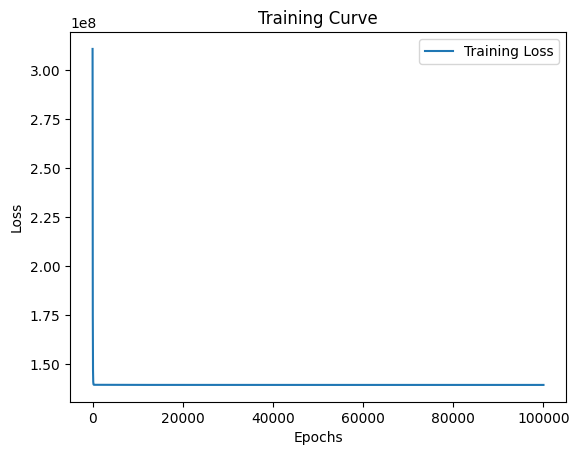

In [43]:
linear_reg.plot_curve()

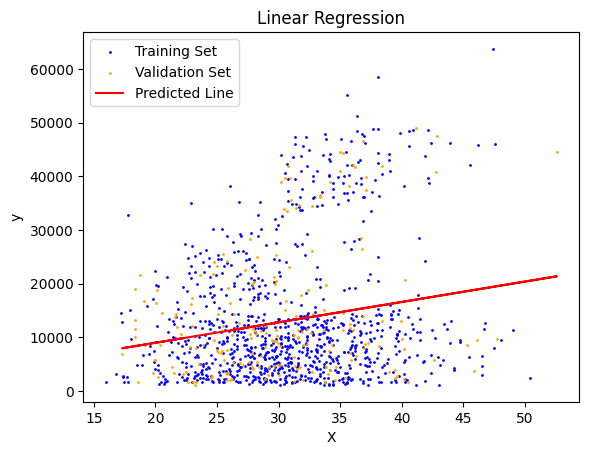

In [44]:
# Use matplotlib to plot the predicted line with the training and validation samples

# TODO
plt.scatter(x_train, y_train, color='blue', s= 1 ,label='Training Set')
plt.scatter(x_val, y_val, color='orange', s=1,label='Validation Set')
y_pred = linear_reg.predict(x_val)
plt.plot(x_val, y_pred, color='red', label='Predicted Line')
plt.legend()
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression')

plt.show()

# Multiple features

In [45]:
# Do not modify here

x_train = df_train.drop(['charges'], axis=1)
y_train = df_train['charges']

x_val = df_val.drop(['charges'], axis=1)
y_val = df_val['charges']

x_test = df_test.drop(['charges'], axis=1)

In [46]:
# TODO
# You may convert data to NumPy here 
x_train = x_train.to_numpy()
y_train = y_train.to_numpy()

x_test = x_test.to_numpy()

x_val = x_val.to_numpy()
y_val = y_val.to_numpy()

In [47]:
batch_size = x_train.shape[0]

# TODO
# Tune the parameters
# Refer to slide page 10
lr = 0.00074328
epochs = 500000

linear_reg = LinearRegression()
linear_reg.fit(x_train, y_train, lr=lr, epochs=epochs, batch_size=batch_size)

Don't cheat.


In [48]:
print("Intercepts: ", linear_reg.weights[-1])
print("Weights: ", linear_reg.weights[:-1])

Intercepts:  [-11856.74315805]
Weights:  [[  259.84939524]
 [ -383.56549798]
 [  333.32541527]
 [  442.55229854]
 [24032.20797775]
 [ -416.02041784]]


In [49]:
print('training loss: ', linear_reg.evaluate(x_train, y_train))

training loss:  34697170.25635797


In [50]:
print('validation loss: ', linear_reg.evaluate(x_val, y_val))

validation loss:  41958543.007377975


In [51]:
test_pred = linear_reg.predict(x_test)

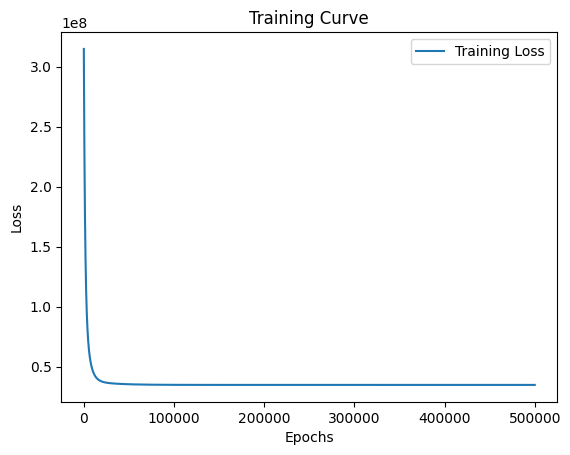

In [52]:
linear_reg.plot_curve()

# Train your own model and predict for testing data.

In [53]:
def varible_extend( df, expend = ['age','bmi','smoker','children'], drop_list=['region','sex'] ) :
    X = df.drop(drop_list, axis=1)

    for i in range(len(expend)) :
        for j in range(i+1,len(expend)) :
            name = f'{expend[i]}*{expend[j]}'
            X[name] = X[expend[i]]*X[expend[j]]
            # X[name] = (X[name] - X[name].min())/ (X[name].max() - X[name].min())
            # X[name] = (X[name] - X[name].mean())/X[name].std()
        # X[expend[i]] = (X[expend[i]] - X[expend[i]].min())/ (X[expend[i]].max() - X[expend[i]].min())
        # X[expend[i]] = (X[expend[i]] - X[name].mean())/X[expend[i]].std()  
    # X = X[['smoker' , 'bmi*smoker' , 'age*smoker', 'bmi', 'age', 'age*age', 'age*bmi' , 'smoker*children', 'bmi*bmi', 'bmi*smoker','smoker*smoker', 'age*children']]
    X = X.drop(['children','charges'], axis=1)
    return X

In [54]:
x_train = varible_extend(df_train)

y_train = df_train['charges']

x_val = varible_extend(df_val)
y_val = df_val['charges']

x_test = varible_extend(df_test,drop_list=['region','sex'])

x_train.head()
x_val.corr()



,age,bmi,smoker,age*bmi,age*smoker,age*children,bmi*smoker,bmi*children,smoker*children
age,1.000000,0.130611,-0.096093,0.861273,0.051036,0.248151,-0.080379,0.024139,-0.015737
bmi,0.130611,1.000000,0.050937,0.585898,0.069215,0.022716,0.181451,0.180193,-0.028706
smoker,-0.096093,0.050937,1.000000,-0.054157,0.939599,0.088642,0.967226,0.096030,0.726466
age*bmi,0.861273,0.585898,-0.054157,1.000000,0.079872,0.209772,0.014435,0.103543,-0.031401
age*smoker,0.051036,0.069215,0.939599,0.079872,1.000000,0.152558,0.919220,0.121849,0.727410
age*children,0.248151,0.022716,0.088642,0.209772,0.152558,1.000000,0.068706,0.900260,0.347362
bmi*smoker,-0.080379,0.181451,0.967226,0.014435,0.919220,0.068706,1.000000,0.108023,0.670605
bmi*children,0.024139,0.180193,0.096030,0.103543,0.121849,0.900260,0.108023,1.000000,0.337648
smoker*children,-0.015737,-0.028706,0.726466,-0.031401,0.727410,0.347362,0.670605,0.337648,1.000000


In [55]:
x_train = x_train.to_numpy()
y_train = y_train.to_numpy()
x_test = x_test.to_numpy()
x_val = x_val.to_numpy()
y_val = y_val.to_numpy()


In [56]:
batch_size = x_train.shape[0]

# TODO
# Tune the parameters
# Refer to slide page 10
lr=0.0000011005
epochs = 50000000

linear_reg = LinearRegression()
linear_reg.fit(x_train, y_train, lr=lr, epochs=epochs, batch_size=batch_size)



Don't cheat.


In [57]:
print("Intercepts: ", linear_reg.weights[-1])
print("Weights: ", linear_reg.weights[:-1])

print('training loss: ', linear_reg.evaluate(x_train, y_train))

print('validation loss: ', linear_reg.evaluate(x_val, y_val))

Intercepts:  [-1281.20373851]
Weights:  [[ 1.87699042e+02]
 [-6.96151255e+01]
 [-4.97701506e+03]
 [ 3.05138256e+00]
 [-1.06954654e+02]
 [ 4.00552846e+00]
 [ 1.10370684e+03]
 [ 1.11139939e+01]
 [-3.10276980e+02]]
training loss:  23051747.514224824
validation loss:  28649969.26760147


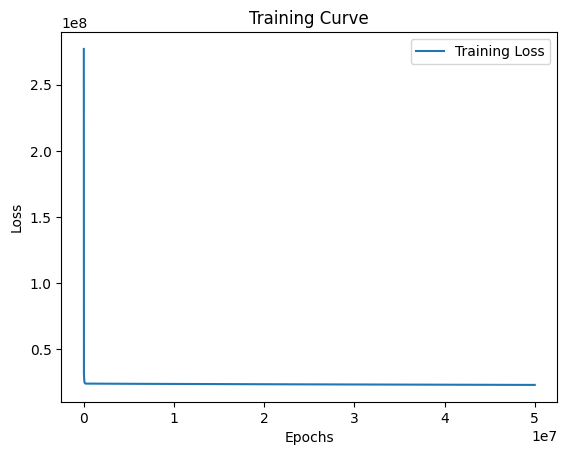

In [58]:
linear_reg.plot_curve()

In [59]:
test_pred = linear_reg.predict(x_test)
print("test_pred shape: ", test_pred.shape)
assert test_pred.shape == (200, 1)

test_pred shape:  (200, 1)


# Output the csv file

In [60]:
df_test = pd.DataFrame(pd.read_csv("./regression_test.csv"))
df_test["charges"] = test_pred
df_test.to_csv("sample_output.csv")